In [6]:
pip install openpyxl

                                              0.0/250.9 kB ? eta -:--:--
     -                                        10.2/250.9 kB ? eta -:--:--
     ----                                  30.7/250.9 kB 325.1 kB/s eta 0:00:01
     ----------                            71.7/250.9 kB 491.5 kB/s eta 0:00:01
     ----------------------               153.6/250.9 kB 833.5 kB/s eta 0:00:01
     -------------------------------------  245.8/250.9 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 250.9/250.9 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: C:\Users\Naman_Sinha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [182]:
import pandas as pd
import numpy as np
import openpyxl

df = pd.read_excel('flight_price.xlsx')

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [68]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [118]:
df.duplicated().sum()
duplicates = [df[df.duplicated()]]
print(duplicates)

[           Airline Date_of_Journey    Source Destination  \
683    Jet Airways       1/06/2019     Delhi      Cochin   
1061     Air India      21/05/2019     Delhi      Cochin   
1348     Air India      18/05/2019     Delhi      Cochin   
1418   Jet Airways       6/06/2019     Delhi      Cochin   
1674        IndiGo      24/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10594  Jet Airways      27/06/2019     Delhi      Cochin   
10616  Jet Airways       1/06/2019     Delhi      Cochin   
10634  Jet Airways       6/06/2019     Delhi      Cochin   
10672  Jet Airways      27/06/2019     Delhi      Cochin   
10673  Jet Airways      27/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
683    DEL → NAG → BOM → COK    14:35  04:25 02 Jun  13h 50m     2 stops   
1061   DEL → GOI → BOM → COK    22:00  19:15 22 May  21h 15m     2 stops   
1348   DEL → HYD → BOM → COK    17:15  19:15 19 Ma

In [158]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [184]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]
print(df['Year'])

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Year, Length: 10683, dtype: object


In [185]:
# change the data type of the columns
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df ['Year'] = df['Year'].astype(int)

In [186]:
# drop the column Date_of_Journey

df.drop('Date_of_Journey', axis=1, inplace=True)

In [187]:
# Arrival time
# Extracting the hour and minute from the Arrival_Time column
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: x.split(' ')[0])
print(df['Arrival_Time'])
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute'] = df['Arrival_Time'].str.split(':').str[1]
# change the data type of the columns to int 
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Minute'] = df['Arrival_Minute'].astype(int)
# drop the column Arrival_Time
df.drop('Arrival_Time', axis=1, inplace=True)
df.head()

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object


,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [188]:
# apply the same steps for the Departure_Time column
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'].str.split(':').str[1]
# change the data type of the columns to int
df['Departure_Hour'] = df['Departure_Hour'].astype(int)
df['Departure_Minute'] = df['Departure_Minute'].astype(int)
# drop the column Dep_Time
df.drop('Dep_Time', axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [189]:
df['Total_Stops'].unique()
# ordinal encoding of Total_Stops column
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4, np.nan: 1})
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [165]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [190]:
# drop the Route column
df.drop('Route', axis=1, inplace=True)

In [167]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [191]:
# convert duration to minutes and drop the Duration column

df['Duration_Mins'] = [
    int(dur.split('h')[0]) * 60 + int(dur.split('h')[1].split('m')[0]) if 'h' in dur and 'm' in dur 
    else int(dur.split('h')[0]) * 60 if 'h' in dur 
    else int(dur.split('m')[0]) 
    for dur in df['Duration']
]
print(df['Duration_Mins'])
df.drop('Duration', axis=1, inplace=True)

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_Mins, Length: 10683, dtype: int64


In [169]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,285


In [206]:
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame
encoder = OneHotEncoder()

# Fit and transform the data for the specified columns
encoded_array = encoder.fit_transform(df[['Airline', 'Source', 'Destination']]).toarray()

# Convert the resulting array into a DataFrame with the correct column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out())

# Check the result
print(encoded_df.head())
df = pd.concat([df, encoded_df], axis=1)
df.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)
df.head()


   Airline_Air Asia  Airline_Air India  Airline_GoAir  Airline_IndiGo  \
0               0.0                0.0            0.0             1.0   
1               0.0                1.0            0.0             0.0   
2               0.0                0.0            0.0             0.0   
3               0.0                0.0            0.0             1.0   
4               0.0                0.0            0.0             1.0   

   Airline_Jet Airways  Airline_Jet Airways Business  \
0                  0.0                           0.0   
1                  0.0                           0.0   
2                  1.0                           0.0   
3                  0.0                           0.0   
4                  0.0                           0.0   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                        0.0                                        0.0   
1                        0.0                                        0.0   

,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,No info,3897,24,3,2019,1,10,22,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,No info,7662,1,5,2019,13,15,5,50,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,No info,13882,9,6,2019,4,25,9,25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,No info,6218,12,5,2019,23,30,18,5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,No info,13302,1,3,2019,21,35,16,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [192]:
df.describe()

,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Mins
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,13.348778,24.690630,12.490686,24.411214,643.093232
std,0.675199,4611.359167,8.479277,1.164357,0.0,6.859125,16.506036,5.748650,18.767980,507.862001
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,170.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,520.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,930.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,2860.000000


In [207]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10683 non-null  int64  
 1   Additional_Info                            10683 non-null  object 
 2   Price                                      10683 non-null  int64  
 3   Date                                       10683 non-null  int32  
 4   Month                                      10683 non-null  int32  
 5   Year                                       10683 non-null  int32  
 6   Arrival_Hour                               10683 non-null  int32  
 7   Arrival_Minute                             10683 non-null  int32  
 8   Departure_Hour                             10683 non-null  int32  
 9   Departure_Minute                           10683 non-null  int32  
 10  Duration_Mins         

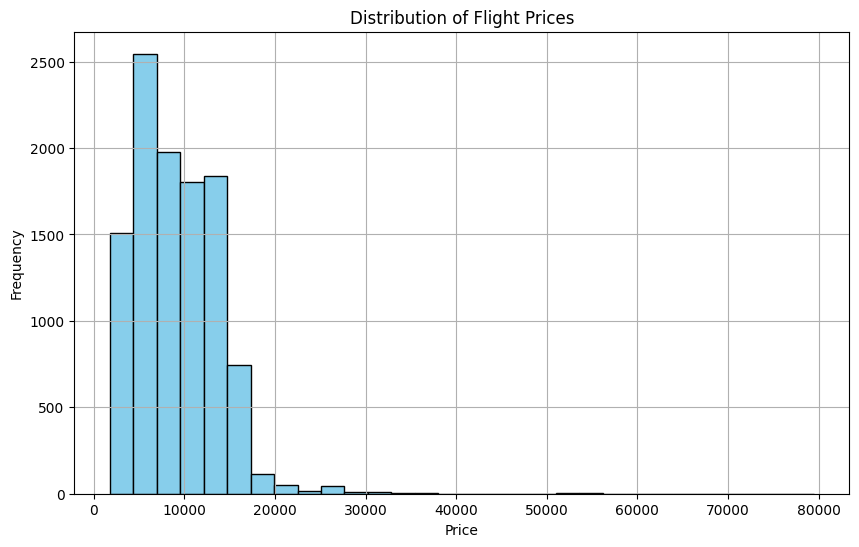

In [194]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Optional: Set the figure size for better visibility
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')  # Create the histogram
plt.title('Distribution of Flight Prices')  # Title for the plot
plt.xlabel('Price')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.grid(True)  # Optional: Add grid lines
plt.show()  # Show the plot

In [180]:
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

C:\Users\Naman_Sinha\AppData\Local\Temp\ipykernel_25132\802430014.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Airline', y='Price', data=df, palette='Set2')


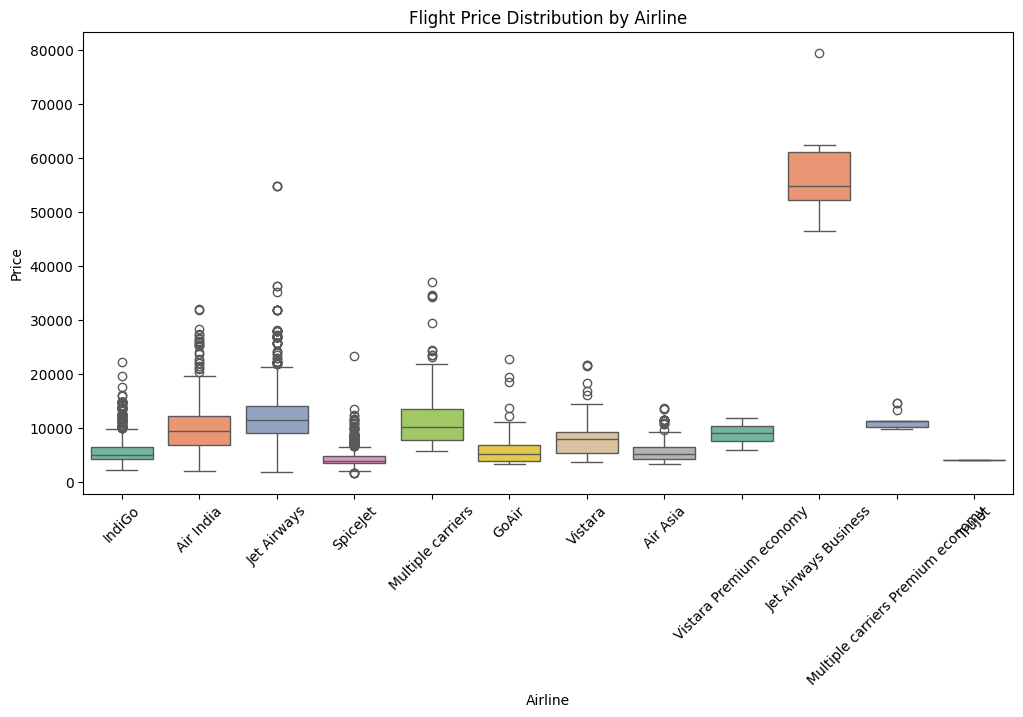

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'Price' and 'Airline' columns
plt.figure(figsize=(12, 6))  # Optional: Set the figure size for better visibility

# Create a boxplot comparing flight prices by airline
sns.boxplot(x='Airline', y='Price', data=df, palette='Set2')
plt.title('Flight Price Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')

# Rotate x-axis labels if necessary (to improve readability)
plt.xticks(rotation=45)

# Show the plot
plt.show()

plt.show()

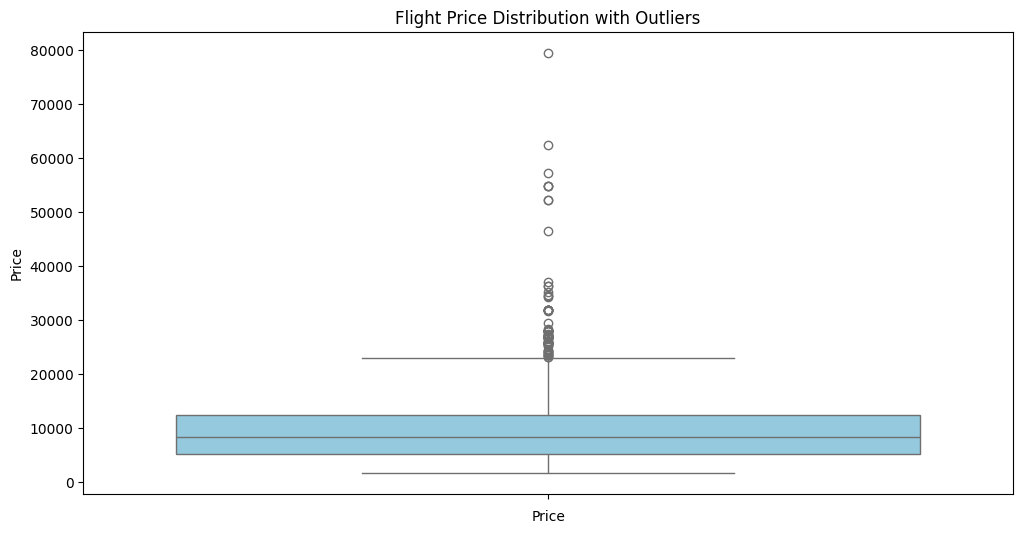

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Price' is the column of interest
plt.figure(figsize=(12, 6))  # Optional: Set the figure size for better visibility

# Create a boxplot for flight prices
sns.boxplot(y=df['Price'], color='skyblue')

# Set plot title and labels
plt.title('Flight Price Distribution with Outliers')
plt.xlabel('Price')

# Show the plot
plt.show()

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (12).

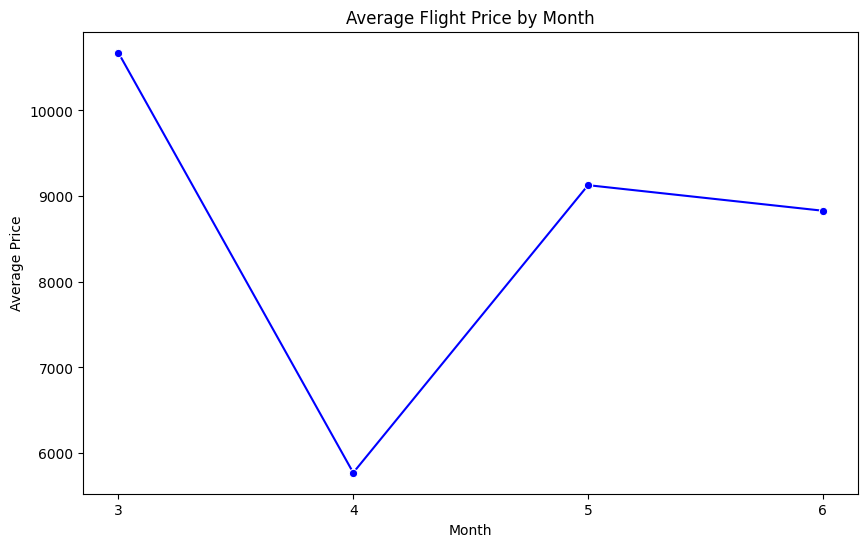

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Month' and calculate the average price
monthly_avg_price = df.groupby('Month')['Price'].mean()

# Plot the average price by month
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_price.index, y=monthly_avg_price.values, marker='o', color='blue')
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(ticks=monthly_avg_price.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [205]:
df['Year'].unique()

array([2019])

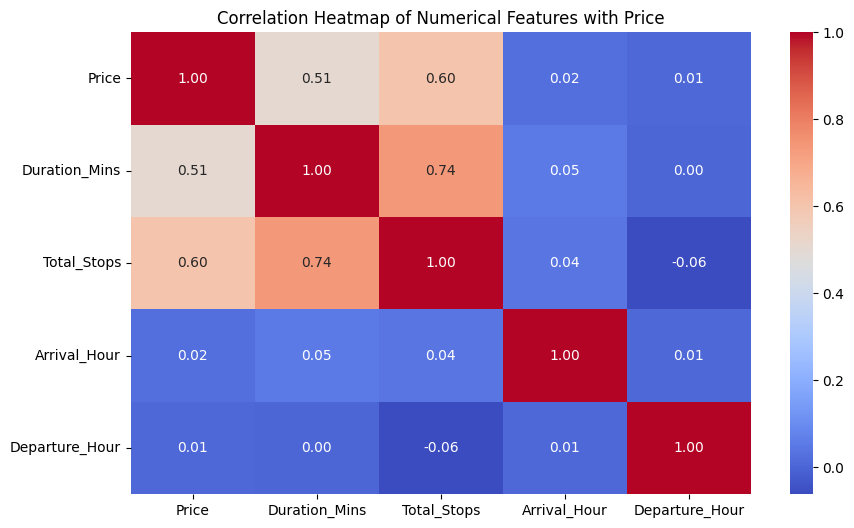

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numerical features
correlation_matrix = df[['Price', 'Duration_Mins', 'Total_Stops', 'Arrival_Hour', 'Departure_Hour']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features with Price')
plt.show()